### We will introduce:
1. **MONAI Getting Started**
    - Transformation
    - Datset
    - Network
    - MONAI Vista3D


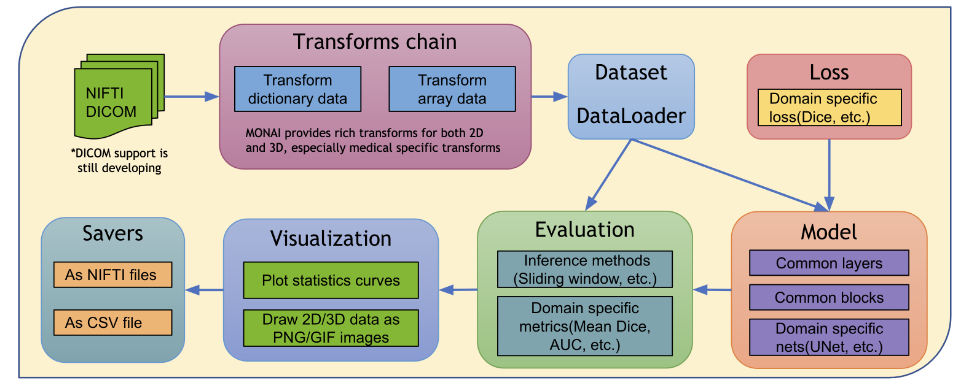

### Reference: <a href="https://github.com/Project-MONAI/MONAIBootcamp2021">MONAI bootcamp 2021</a>

In [7]:
!apt update
!apt install -y tree

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.7 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2221 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [51.8 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2498 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1425 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3041 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports/universe amd64 Packages [33.7 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports/main amd64 Packages [81.4 kB]33m
Get:13 http://securit

### MONAI Installation

In [1]:
!git clone https://github.com/Project-MONAI/VISTA.git
%cd ./VISTA/vista3d
!pip install -r requirements.txt
%cd ../..

fatal: destination path 'VISTA' already exists and is not an empty directory.
/mount/src/MONAI/Getting_started/VISTA/vista3d


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 40.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 195.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 173.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 246.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 751.2/751.2 kB 255.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 248.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import monai
import torch

## Creating dummy data
- monai.data.create_test_image_3d

In [3]:
keys = ["img", "seg"]
filenames = []
root_dir = './data'
!mkdir $root_dir
n_data = 5

for i in range(n_data):
    im, seg = monai.data.create_test_image_3d(256, 256, 256, num_objs=25, rad_max=50)

    im_filename = f"{root_dir}/im{i}.nii.gz"
    seg_filename = f"{root_dir}/seg{i}.nii.gz"
    filenames.append({"img": im_filename, "seg": seg_filename})

    n = nib.Nifti1Image(im, np.eye(4))
    nib.save(n, im_filename)

    n = nib.Nifti1Image(seg, np.eye(4))
    nib.save(n, seg_filename)

In [ ]:
!ls './data'

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(im[128], cmap='gray')
plt.subplot(122)
plt.imshow(seg[128], cmap='gray')
plt.show()

In [ ]:
im.min(), im.max(), seg.max()

## Transforms
https://docs.monai.io/en/latest/transforms.html
- monai.transforms

"Medical images require highly specialized methods for **I/O, preprocessing, and augmentation**. Medical images are often in specialized formats with rich meta-information, and the data volumes are often high-dimensional. These require carefully designed manipulation procedures. The medical imaging focus of MONAI is enabled by powerful and flexible image transformations that facilitate user-friendly, reproducible, optimized medical data pre-processing pipelines." <a href="https://docs.monai.io/en/latest/highlights.html#medical-image-data-i-o-processing-and-augmentation">Source</a>

In [7]:
trans = monai.transforms.Compose([monai.transforms.LoadImage(image_only=True), # I/O
                                  monai.transforms.AddChannel(), # Pre-processing
                                  monai.transforms.RandGaussianNoise(prob=0.5, std=0.5), # Augmentation
                                  monai.transforms.ToTensor()]) # Pre-processing

In [ ]:
filenames[0]

In [ ]:
# Run this cell several times to check the rand term
img = trans(filenames[0]["img"])
print(type(img), img.shape)
plt.imshow(img[0, 128], cmap='gray')

1. Customize transforms: Lambda
    - monai.transforms.Lambda

In [ ]:
def sum_width(img):
    return img.sum(1)

trans = monai.transforms.Compose([monai.transforms.LoadImage(image_only=True), 
                                  monai.transforms.AddChannel(), 
                                  monai.transforms.Lambda(sum_width)])
img = trans(filenames[0]["img"])
plt.imshow(img[0])

2. Customize transforms: inherit

In [ ]:
class SumDimension(monai.transforms.Transform):
    def __init__(self, dim=1):
        self.dim = dim

    def __call__(self, inputs):
        return inputs.sum(self.dim)

trans = monai.transforms.Compose([monai.transforms.LoadImage(image_only=True), 
                                  monai.transforms.AddChannel(), 
                                  SumDimension()])
img = trans(filenames[0]["img"])
plt.imshow(img[0])

#### Exercise

In [ ]:
# Try to implement the transforms below into Compose()
#   -  monai.transforms.Resize, size=(100, 100, 100)
#   -  monai.transforms.RandFlip, prob=0.5

trans = monai.transforms.Compose([monai.transforms.LoadImage(image_only=True), 
                                  monai.transforms.AddChannel(), 
                                  # Resize
                                  # RandFlip
                                  monai.transforms.RandGaussianNoise(prob=0.5, std=0.5),
                                  monai.transforms.ToTensor(),])

trans(filenames[0]["img"])
print(type(img), img.shape)
plt.imshow(img[0, 50], cmap='gray')

In [ ]:
# Fix the Normalize transform (mean=0, std=1)
class Normalize(monai.transforms.Transform):
    def __init__(self):
        None

    def __call__(self, inputs):
        return inputs
    
trans = monai.transforms.Compose([monai.transforms.LoadImage(image_only=True), 
                                  monai.transforms.AddChannel()])

trans_norm = monai.transforms.Compose([monai.transforms.LoadImage(image_only=True), 
                                       monai.transforms.AddChannel(), 
                                       Normalize()])

img = trans(filenames[0]["img"])
img_norm = trans_norm(filenames[0]["img"])
print('Original mean:', img.mean(), ', std:', img.std())
print('Normalized mean:', img_norm.mean(), ', std:', img_norm.std())

## Dictionary Transforms
https://docs.monai.io/en/latest/transforms.html#dictionary-transforms

In [ ]:
keys

In [13]:
# Dictionary version, the input data should be dictionary with keys
trans = monai.transforms.Compose([monai.transforms.LoadImaged(keys), # I/O
                                  monai.transforms.AddChanneld(keys), # Pre-processing
                                  monai.transforms.RandGaussianNoised(keys='img', prob=0.5, std=0.5), # Augmentation
                                  monai.transforms.ToTensord(keys)]) # Pre-processing

In [ ]:
filenames[0]

In [ ]:
img_seg = trans(filenames[0])
print(type(img_seg), img_seg['img'].shape, img_seg['img'].get_device())
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(img_seg['img'][0, 128], cmap='gray')
plt.subplot(122)
plt.imshow(img_seg['seg'][0, 128], cmap='gray')

#### Exercise

In [ ]:
# Fix the saveOriginalShaped transform

class SaveOriginalShaped(monai.transforms.MapTransform):
    def __init__(self, img_key, shape_key='ori_shape'):
        self.img_key = img_key
        self.shape_key = shape_key

    def __call__(self, inputs):
        return inputs
    
trans = monai.transforms.Compose([monai.transforms.LoadImaged(keys), 
                                  monai.transforms.AddChanneld(keys), 
                                  SaveOriginalShaped('img', 'shape'),
                                  monai.transforms.Resized(keys, spatial_size=(100, 100, 100),),
                                  monai.transforms.ToTensord(keys)])

img_seg = trans(filenames[0])
img_seg['img'].shape, img_seg['shape']

## GPU Accelerated Transforms

- Without GPU Accelerated

In [ ]:
trans_list = [monai.transforms.LoadImage(image_only=True),
              monai.transforms.EnsureType(),
              monai.transforms.AddChannel(), 
              monai.transforms.ScaleIntensityRange(-1, 1),
              monai.transforms.RandSpatialCrop(roi_size=(192, 192, 192)),
              monai.transforms.Resize([100, 100, 100]),
              monai.transforms.RandFlip(prob=1),
              monai.transforms.RandGaussianNoise(prob=0.5, std=0.5),
              monai.transforms.ToDevice(device='cuda:0'),]    
trans = monai.transforms.Compose(trans_list)

n = 20
t1 = time.time()
for i in range(n):
    img = trans(filenames[0]["img"])
t2 = time.time()
print(round((t2-t1)/n, 4))

- With GPU Accelerated

In [ ]:
trans_list = [monai.transforms.LoadImage(image_only=True),
              monai.transforms.EnsureType(),
              monai.transforms.ToDevice(device='cuda:0'),
              monai.transforms.AddChannel(), 
              monai.transforms.ScaleIntensityRange(-1, 1),
              monai.transforms.RandSpatialCrop(roi_size=(192, 192, 192)),
              monai.transforms.Resize([100, 100, 100]),
              monai.transforms.RandFlip(prob=1),
              monai.transforms.RandGaussianNoise(prob=0.5, std=0.5),]    
trans = monai.transforms.Compose(trans_list)

n = 20
t1 = time.time()
for i in range(n):
    img = trans(filenames[0]["img"])
t2 = time.time()
print(round((t2-t1)/n, 4))

## Dataset
https://docs.monai.io/en/latest/data.html
- monai.data.Dataset

"Users often need to train the model with many (potentially thousands of) epochs over the data to achieve the desired model quality. A native PyTorch implementation may repeatedly load data and run the same preprocessing steps for every epoch during training, which can be time-consuming and unnecessary, especially when the medical image volumes are large." <a href="https://docs.monai.io/en/latest/highlights.html#datasets-and-dataloader">Source</a>

In [ ]:
items = [{"data": 1}, 
         {"data": 2}, 
         {"data": 3}, 
         {"data": 4}, 
         {"data": 5},
         {"data": 6},
         {"data": 7}]
dataset = monai.data.Dataset(items, transform=None)

print(f"Length of dataset is {len(dataset)}")
for item in dataset:
    print(item)

In [ ]:
# Compatible with the PyTorch DataLoader
for item in torch.utils.data.DataLoader(dataset, batch_size=2):
    print(item)

### Dataset Caching

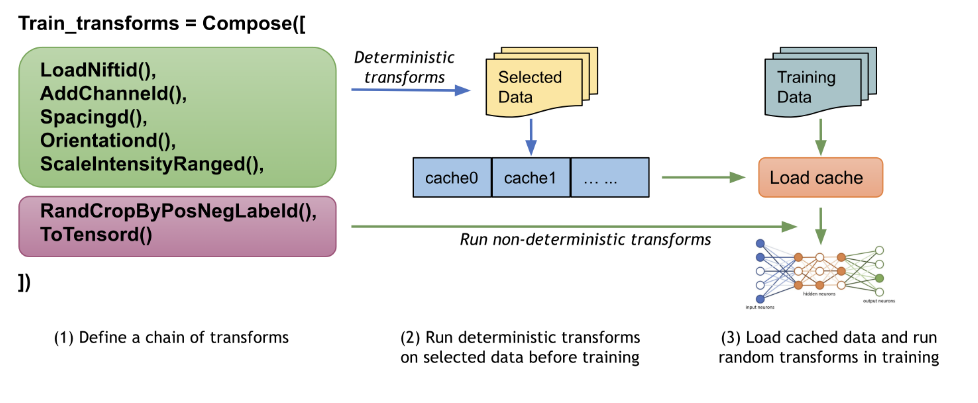

In [ ]:
class SlowSquare(monai.transforms.MapTransform):
    def __init__(self, keys):
        monai.transforms.MapTransform.__init__(self, keys)

    def __call__(self, x):
        time.sleep(1.0) # delay 1 second here
        output = {key: x[key] ** 2 for key in self.keys}
        return output

square_dataset = monai.data.Dataset(items, transform=SlowSquare(keys='data'))

In [ ]:
%time for item in square_dataset: print(item)

### CacheDataset

In [ ]:
square_cached = monai.data.CacheDataset(items, transform=SlowSquare(keys='data'))

In [ ]:
%time for item in square_cached: print(item)

### PersistentDataset

In [ ]:
!rm -r my_cache
square_persist = monai.data.PersistentDataset(items, transform=SlowSquare(keys='data'), cache_dir="my_cache")

In [ ]:
!ls my_cache/

In [ ]:
%time for item in square_persist: print(item)

In [ ]:
!ls my_cache/

In [ ]:
%time for item in square_persist: print(item)

### Exploration of CacheDataset and GPU Acceleration

- Put the preprocessing transforms in the right position

In [ ]:
## Right
class SlowSquare(monai.transforms.Transform):
    def __init__(self):
        None

    def __call__(self, inputs):
        time.sleep(1.0) # delay 1 second here
        inputs = inputs ** 2
        return inputs

trans_list = [monai.transforms.LoadImage(image_only=True),
              monai.transforms.EnsureType(),
              monai.transforms.AddChannel(), 
              monai.transforms.ScaleIntensityRange(-1, 1),
              SlowSquare(),
              monai.transforms.RandSpatialCrop(roi_size=(192, 192, 192)),
              monai.transforms.Resize([100, 100, 100]),
              monai.transforms.RandFlip(prob=1),
              monai.transforms.RandGaussianNoise(prob=0.5, std=0.5),
              monai.transforms.ToDevice(device='cuda:0'),]    
trans = monai.transforms.Compose(trans_list)

data = [filenames[0]["img"] for i in range(5)]
cached = monai.data.CacheDataset(data, transform=trans)

n = 2
t1 = time.time()
for i in range(n):
    for i in cached:
        i.shape
t2 = time.time()
print(round((t2-t1)/(n*len(cached)), 4))

In [ ]:
## Wrong
trans_list = [monai.transforms.LoadImage(image_only=True),
              monai.transforms.EnsureType(),
              monai.transforms.AddChannel(), 
              monai.transforms.ScaleIntensityRange(-1, 1),
              monai.transforms.RandSpatialCrop(roi_size=(192, 192, 192)),
              SlowSquare(),
              monai.transforms.Resize([100, 100, 100]),
              monai.transforms.RandFlip(prob=1),
              monai.transforms.RandGaussianNoise(prob=0.5, std=0.5),
              monai.transforms.ToDevice(device='cuda:0'),]     
trans = monai.transforms.Compose(trans_list)

data = [filenames[0]["img"] for i in range(5)]
cached = monai.data.CacheDataset(data, transform=trans)

n = 2
t1 = time.time()
for i in range(n):
    for i in cached:
        i.shape
t2 = time.time()
print(round((t2-t1)/n, 4))

- GPU Acceleration

In [ ]:
trans_list = [monai.transforms.LoadImage(image_only=True),
              monai.transforms.EnsureType(),
              monai.transforms.ToDevice(device='cuda:0'),
              monai.transforms.AddChannel(), 
              monai.transforms.ScaleIntensityRange(-1, 1),
              SlowSquare(),
              monai.transforms.RandSpatialCrop(roi_size=(192, 192, 192)),
              monai.transforms.Resize([100, 100, 100]),
              monai.transforms.RandFlip(prob=1),
              monai.transforms.RandGaussianNoise(prob=0.5, std=0.5),]    
trans = monai.transforms.Compose(trans_list)

data = [filenames[0]["img"] for i in range(5)]
cached = monai.data.CacheDataset(data, transform=trans)

n = 20
t1 = time.time()
for i in range(n):
    for i in cached:
        i.shape
t2 = time.time()
print(round((t2-t1)/(n*len(cached)), 4))

## Network
https://docs.monai.io/en/latest/networks.html

#### Built-in network
- https://docs.monai.io/en/latest/networks.html#nets

In [ ]:
net = monai.networks.nets.UNet(
    spatial_dims=3,  # 2 or 3 for a 2D or 3D network
    in_channels=1,  # number of input channels
    out_channels=1,  # number of output channels
    channels=[8, 16],  # channel counts for layers
    strides=[2]  # strides for mid layers
)

In [ ]:
net

In [ ]:
net(torch.ones(2, 1, 24, 24, 24)).shape

## MONAI Vista 3D

### Preparing Samples

In [2]:
!gdown --fuzzy https://drive.google.com/file/d/1lE6cwNhtFPd0KkkaCDdNNeGWinLmxA-R/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1lE6cwNhtFPd0KkkaCDdNNeGWinLmxA-R
From (redirected): https://drive.google.com/uc?id=1lE6cwNhtFPd0KkkaCDdNNeGWinLmxA-R&confirm=t&uuid=3a34c18e-b61f-4cc6-aaf2-462511507525
To: /mount/src/MONAI/Getting_started/spleen_samples.zip
100%|██████████████████████████████████████| 58.7M/58.7M [00:01<00:00, 40.9MB/s]


In [3]:
!unzip spleen_samples.zip
!mv data/ mydata

Archive:  spleen_samples.zip
   creating: data/
   creating: data/spleen_img/
 extracting: data/spleen_img/spleen_10.nii.gz  
 extracting: data/spleen_img/spleen_3.nii.gz  
 extracting: data/spleen_img/spleen_56.nii.gz  
 extracting: data/spleen_img/spleen_8.nii.gz  
 extracting: data/spleen_img/spleen_9.nii.gz  
   creating: data/spleen_seg/
 extracting: data/spleen_seg/spleen_10.nii.gz  
 extracting: data/spleen_seg/spleen_3.nii.gz  
 extracting: data/spleen_seg/spleen_56.nii.gz  
 extracting: data/spleen_seg/spleen_8.nii.gz  
 extracting: data/spleen_seg/spleen_9.nii.gz  
MONAI_Getting_Started_Exploration_colab.ipynb  mydata
MONAI_Getting_Started_Train_a_Model.ipynb      spleen_samples.zip


In [4]:
!tree mydata

mydata
├── spleen_img
│   ├── spleen_10.nii.gz
│   ├── spleen_3.nii.gz
│   ├── spleen_56.nii.gz
│   ├── spleen_8.nii.gz
│   └── spleen_9.nii.gz
└── spleen_seg
    ├── spleen_10.nii.gz
    ├── spleen_3.nii.gz
    ├── spleen_56.nii.gz
    ├── spleen_8.nii.gz
    └── spleen_9.nii.gz

2 directories, 10 files


### Preparing Vista3D

In [8]:
%cd ./VISTA/vista3d/models
!gdown --fuzzy https://drive.google.com/file/d/1eLIxQwnxGsjggxiVjdcAyNvJ5DYtqmdc/view?usp=sharing
%cd ..

/mount/src/MONAI/Getting_started/VISTA/vista3d/models
Downloading...
From (original): https://drive.google.com/uc?id=1eLIxQwnxGsjggxiVjdcAyNvJ5DYtqmdc
From (redirected): https://drive.google.com/uc?id=1eLIxQwnxGsjggxiVjdcAyNvJ5DYtqmdc&confirm=t&uuid=6c3fe6f6-3c85-445a-b1a3-700fe32f86dd
To: /mount/src/MONAI/Getting_started/VISTA/vista3d/models/model.pt
100%|████████████████████████████████████████| 872M/872M [00:13<00:00, 62.9MB/s]
/mount/src/MONAI/Getting_started/VISTA/vista3d


### Vista3D Segmentation

#### Segment Target Organs
- Set **--label_prompt** for different targets. You can find the target mapping <a href="https://github.com/Project-MONAI/VISTA/blob/main/vista3d/data/jsons/label_dict.json">here</a>

In [9]:
!python -m scripts.infer \
            --config_file 'configs/infer.yaml' \
            - infer \
            --image_file '../../mydata/spleen_img/spleen_3.nii.gz' \
            --label_prompt "[3]" \
            --save_mask true

100%|███████████████████████████████████████████| 32/32 [00:03<00:00, 10.31it/s]
metatensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
         

**Preview the result**

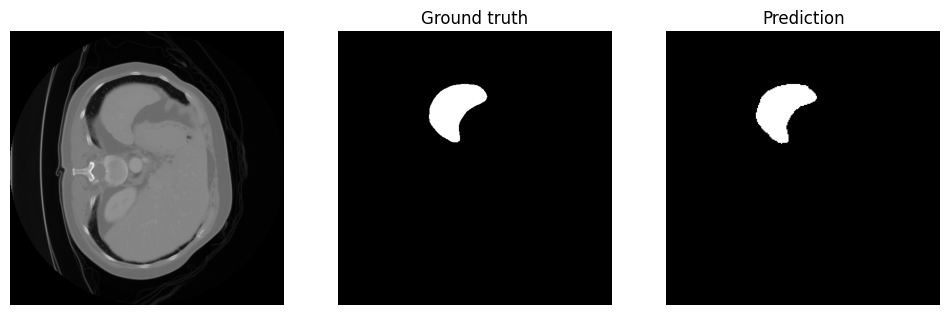

In [22]:
pred = nib.load('./models/prediction/spleen_3/spleen_3_seg.nii.gz').get_fdata()
mask = nib.load('../../mydata/spleen_seg/spleen_3.nii.gz').get_fdata()
image = nib.load('../../mydata/spleen_img/spleen_3.nii.gz').get_fdata()

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(image[..., 28], cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(mask[..., 28], cmap='gray')
plt.axis('off')
plt.title('Ground truth')
plt.subplot(133)
plt.imshow(pred[..., 28], cmap='gray')
plt.axis('off')
plt.title('Prediction')
plt.show()

#### Segment Everything

In [30]:
!python -m scripts.infer \
            --config_file 'configs/infer.yaml' \
            - infer_everything \
            --image_file '../../mydata/spleen_img/spleen_10.nii.gz'

**Preview the result**

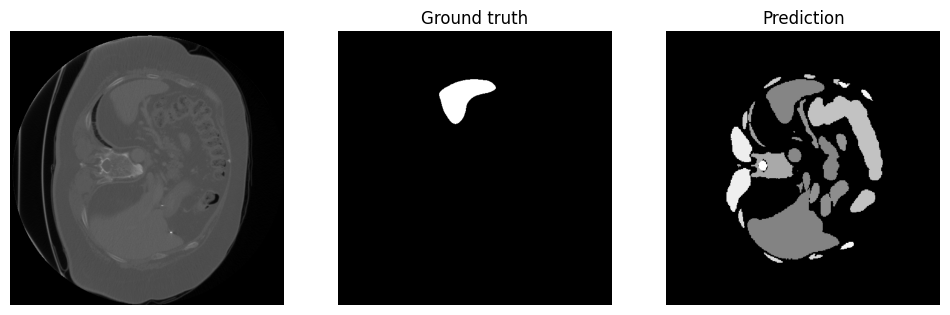

In [29]:
pred = nib.load('./models/prediction/spleen_10/spleen_10_seg.nii.gz').get_fdata()
pred[pred!=0] += 125 # to enhance the visualization
mask = nib.load('../../mydata/spleen_seg/spleen_10.nii.gz').get_fdata()
image = nib.load('../../mydata/spleen_img/spleen_10.nii.gz').get_fdata()

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(image[..., 28], cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(mask[..., 28], cmap='gray')
plt.axis('off')
plt.title('Ground truth')
plt.subplot(133)
plt.imshow(pred[..., 28], cmap='gray')
plt.axis('off')
plt.title('Prediction')
plt.show()

## Exercise

1. Create a dummy dataset

2. Define a GPU accelerated dictionary transformation with `LoadImaged`, `AddChanneld`, `ShiftIntensityd`, `RandSpatialCropd` and `ToTensord`

3. Implement `CacheDataset`/`PersistentDataset` with PyTorch DataLoader

4. Define a 3D UNet with 2 times pooling and 3 channels outputs

5. Feed the data generated by DataLoader to the UNet